# TP 1 : Time series withoud trend nor seasonality

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Load the data:
huron= pd.read_csv('Lakehuron.csv', index_col=0)
huron.index = pd.to_datetime(huron.index)
# the parameter index_col = 0 means that the first column of the datafile will be used to index the rows
# the second line of command transforms the index column (with dates) into a DateTime format (format to manage dates in Python)

In [18]:
# examine the loaded data: 
huron

,Level
1891-01-31,579.14
1892-01-31,579.16
1893-01-31,579.55
1894-01-31,579.67
1895-01-31,578.44
...,...
1968-01-31,578.52
1969-01-31,579.74
1970-01-31,579.31
1971-01-31,579.89


In [24]:
82 rows and 1 column

SyntaxError: invalid syntax (3204315419.py, line 1)

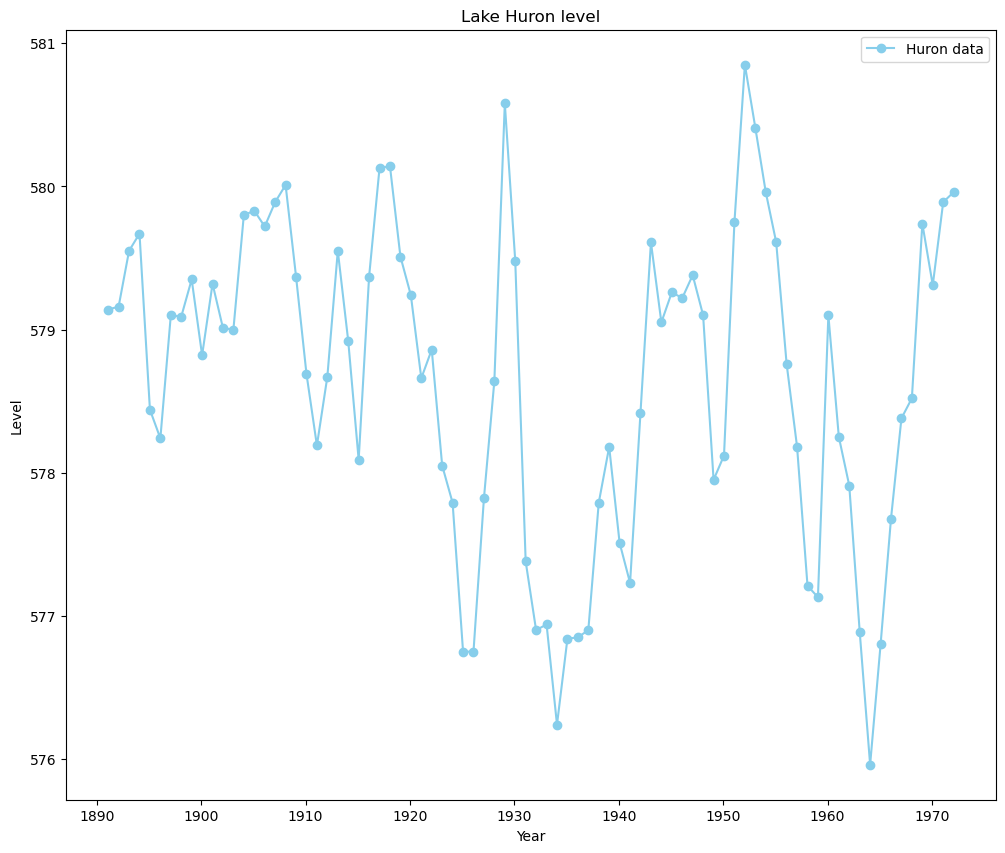

In [9]:
# We will now plot this time series:
plt.figure(figsize=(12, 10)) # creates a figure with the desired size
plt.plot(huron, marker = 'o', color = 'skyblue', label = 'Huron data') # plots the data in the variable huron (by default, index is used for the x-axis and the values for the y-axis).
# marker is used to define how the points will be depicted (you can try something else). You can also change
# the color. The label is the name that you give to the curve (this name will be used in the legend)
plt.title("Lake Huron level") # gives a title to the figure
plt.xlabel("Year") # gives a label to the x-axis
plt.ylabel("Level")# gives a label to the y-axis
plt.legend(loc = 'best') # inserts a legend at the best location

In [10]:
!pip install statsmodels==0.12.1

c:\Users\LARGATON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\LARGATON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


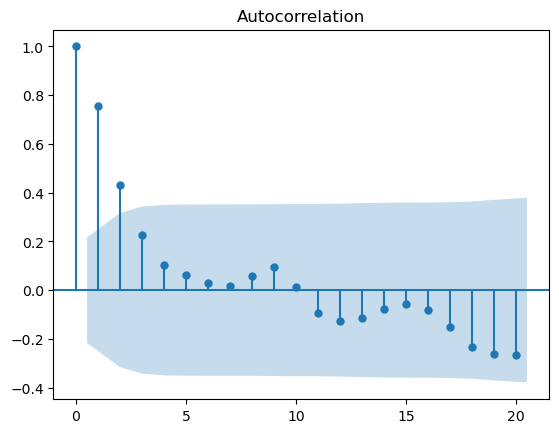

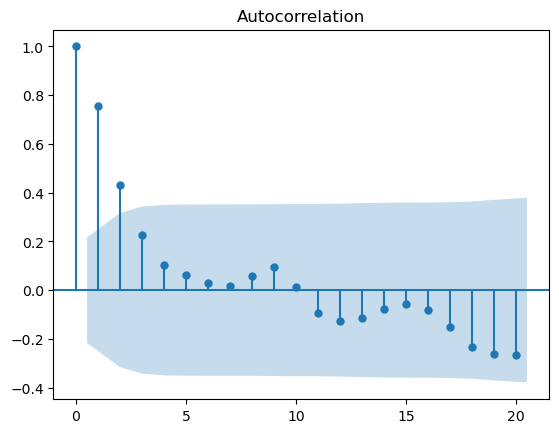

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(huron)

In [20]:
huron_train = huron.iloc[:71,:] # ':71' means rows from the first up to 71 excluded (so 0,1,2,3,...,70) and ':' after the coma means all columns of the dataframe (just one here)
huron_valid = huron.iloc[71:,:] # '71:' means rows from 71 (included) up to the end

# More generally, if df is a dataframe, 
# the command df.iloc[i,j] gets the value at the row number i (starting from 0) and column j (starting from 0)
# the command df.loc[i,j]  gets the value at the row whose index is i and column whose index is j
# with huron for instance, I can get the value at the year 1900 by
# huron.loc['1900-01-31', 'Level']


In [13]:
print("Shape of huron_train:", huron_train.shape)
print("Shape of huron_valid:", huron_valid.shape)


Shape of huron_train: (71, 1)
Shape of huron_valid: (11, 1)


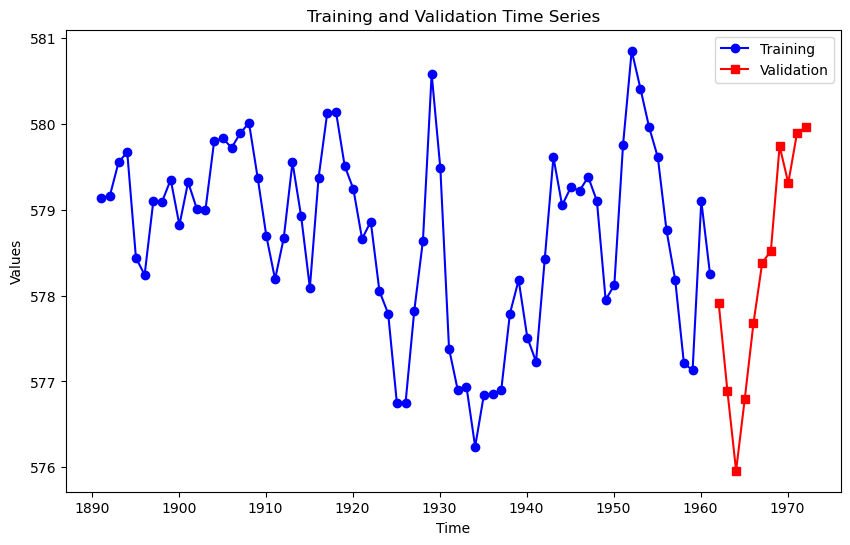

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(huron_train.index, huron_train.values, 'bo-', label='Training')  # Blue color, circle marker
plt.plot(huron_valid.index, huron_valid.values, 'rs-', label='Validation')  # Red color, square marker

# Adding legend
plt.legend()

# Adding titles and labels
plt.title('Training and Validation Time Series')
plt.xlabel('Time')
plt.ylabel('Values')

# Display the plot
plt.show()

## First method : prediction is the last observed value

In [ ]:
Last prediction value 1961 : 578.25
1962 : 578.25

In [22]:

pred_lp = np.repeat(huron_train.values[-1], len(huron_valid))
print(pred_lp)

[578.25 578.25 578.25 578.25 578.25 578.25 578.25 578.25 578.25 578.25
 578.25]


In [23]:
pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])

,Level
1962-01-31,578.25
1963-01-31,578.25
1964-01-31,578.25
1965-01-31,578.25
1966-01-31,578.25
1967-01-31,578.25
1968-01-31,578.25
1969-01-31,578.25
1970-01-31,578.25
1971-01-31,578.25


In [25]:
pred_lp = pd.DataFrame(pred_lp, index=huron_valid.index, columns=['Level'])
print(pred_lp)

             Level
1962-01-31  578.25
1963-01-31  578.25
1964-01-31  578.25
1965-01-31  578.25
1966-01-31  578.25
1967-01-31  578.25
1968-01-31  578.25
1969-01-31  578.25
1970-01-31  578.25
1971-01-31  578.25
1972-01-31  578.25


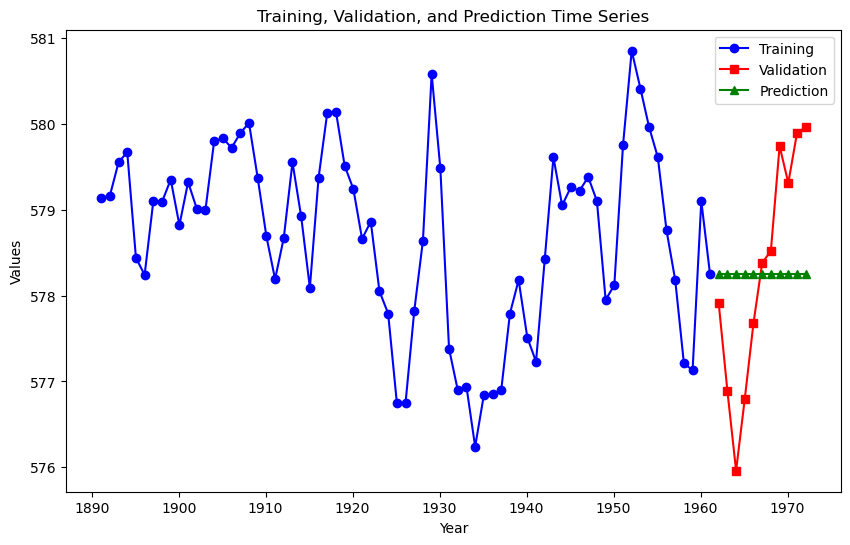

In [26]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(huron_train.index, huron_train.values, 'bo-', label='Training')  # Blue color, circle marker
plt.plot(huron_valid.index, huron_valid.values, 'rs-', label='Validation')  # Red color, square marker
plt.plot(huron_valid.index, pred_lp, 'g^-', label='Prediction')  # Green color, triangle marker
# Adding legend
plt.legend()

# Adding titles and labels
plt.title('Training, Validation, and Prediction Time Series')
plt.xlabel('Year')
plt.ylabel('Values')

# Display the plot
plt.show()

In [47]:
np.mean((pred_lp - huron_valid)**2)
# here we compare the predictions in pred_lp with the true values (in huron_valid) with a substraction, square the errors
# and get the mean (with np.mean)

Level    1.698536
dtype: float64

## Second method : prediction is the mean of all past observed values

## Simple exponential smoothing

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


ses_model = SimpleExpSmoothing(huron_train,initialization_method='known', initial_level=579)
ses_model = ses_model.fit(smoothing_level=0.5, optimized=False)


# Here I ask to use alpha = 0.5 (smoothing level) and xhat_0 = 579 (prediction of the value x_0, initial level)
# We will see a bit later how to ask the algorithm to search for the best values of these parameters
ses_model.summary()

c:\Users\LARGATON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\LARGATON\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (c:\Users\LARGATON\anaconda3\lib\site-packages\scipy\signal\signaltools.py)

In [67]:
ses_model.fittedvalues

1891-01-31    579.000000
1892-01-31    579.070000
1893-01-31    579.115000
1894-01-31    579.332500
1895-01-31    579.501250
                 ...    
1957-01-31    579.299895
1958-01-31    578.739947
1959-01-31    577.974974
1960-01-31    577.552487
1961-01-31    578.326243
Length: 71, dtype: float64

In [73]:
ses_model_2 = SimpleExpSmoothing(huron_train).fit()
# here we do not put any desired values for alpha and the initial level which means that the algorithm will search for the best ones
ses_model_2.summary()

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


Dep. Variable:,Level,No. Observations:,71
Model:,SimpleExpSmoothing,SSE,41.330
Optimized:,True,AIC,-34.418
Trend:,None,BIC,-29.893
Seasonal:,None,AICC,-33.812
Seasonal Periods:,None,Date:,"Sat, 23 Jan 2021"
Box-Cox:,False,Time:,16:18:54
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,579.14022,l.0,True


In [77]:
print('Alpha :',ses_model_2.params['smoothing_level'])
print('xhat_0 :', ses_model_2.params['initial_level'])

Alpha : 0.9999999850983017
xhat_0 : 579.1402183914184


In [79]:
ses_model_2.forecast(10)

1962-01-31    578.25
1963-01-31    578.25
1964-01-31    578.25
1965-01-31    578.25
1966-01-31    578.25
1967-01-31    578.25
1968-01-31    578.25
1969-01-31    578.25
1970-01-31    578.25
1971-01-31    578.25
Freq: A-JAN, dtype: float64

## Auto-regressive models

In [83]:
from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(huron_train, lags = 1, trend = 'c').fit()
ar_model.summary()
# the parameter lags is used to define the order of the AR model you want
# trend = 'c' means that we want a constant (beta_0) in the model

/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency A-JAN will be used.
  % freq, ValueWarning)
/Users/smalinow/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Level   No. Observations:                   71
Model:                     AutoReg(1)   Log Likelihood                 -76.025
Method:               Conditional MLE   S.D. of innovations              0.717
Date:                Sun, 24 Jan 2021   AIC                             -0.580
Time:                        10:04:25   BIC                             -0.484
Sample:                    01-31-1892   HQIC                            -0.542
                         - 01-31-1961                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    149.8478     46.463      3.225      0.001      58.782     240.913
Level.L1       0.7410      0.080      9.230      0.000       0.584       0.898
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3494           +0.0000j            1.3494            0.0000
-----------------------------------------------------------------------------
"""

In [87]:
ar_model.params

intercept    149.847758
Level.L1       0.741047
dtype: float64

In [91]:
ar_model.forecast(1) # 1 here means 1 time instant after the last value of the training data

1962-01-31    578.358328
Freq: A-JAN, dtype: float64

In [92]:
ar_model.bic
# The lower is this value, the better is the fit of the model to the training data

-0.48366674531703335